# Project: Data Science
Exploratory Data Analysis

In [30]:
import pandas as pd

## Credit Card Data

In [118]:
df1 = pd.read_csv("datasets/cc_data.csv", index_col = 0)

In [121]:
df1 = df1.reset_index()
df1.shape

In [125]:
df1['timestamp'] = pd.to_datetime(df1['timestamp'])

Feature engineering: hour of the day

 - follow up to this would be to feature engineer a morning, afternoon, evening

In [133]:
df1['timestamp:hour'] = df1['timestamp'].dt.hour

In [174]:
df1['timestamp:day'] = df1['timestamp'].dt.date

In [175]:
df1.head()

,timestamp,location,price,last4ccnum,timestamp:hour,timestamp:day
0,2014-01-06 07:28:00,Brew've Been Served,11.34,4795,7,2014-01-06
1,2014-01-06 07:34:00,Hallowed Grounds,52.22,7108,7,2014-01-06
2,2014-01-06 07:35:00,Brew've Been Served,8.33,6816,7,2014-01-06
3,2014-01-06 07:36:00,Hallowed Grounds,16.72,9617,7,2014-01-06
4,2014-01-06 07:37:00,Brew've Been Served,4.24,7384,7,2014-01-06


These are the most popular locations independent of time

In [149]:
locations = df1.location.value_counts().head(10)
locations

Katerina's Cafe              212
Hippokampos                  171
Guy's Gyros                  158
Brew've Been Served          156
Hallowed Grounds              92
Ouzeri Elian                  87
Abila Zacharo                 72
Kalami Kafenion               64
Gelatogalore                  64
Frydos Autosupply n' More     47
Name: location, dtype: int64

Subsetting to the 5 most popular locations

In [151]:
most_popular = df1[df1['location'].isin(["Katerina's Cafe", "Hippokampos", "Guy's Gyros", 
                                      "Brew've Been Served", "Hallowed Grounds"])]

Most popular visit times for those locations

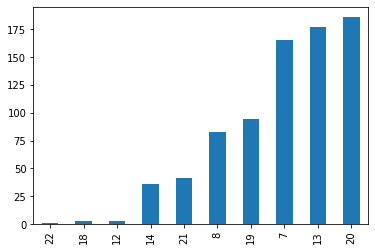

In [166]:
most_popular['timestamp:hour'].value_counts().sort_values().plot(kind='bar')

For each location:

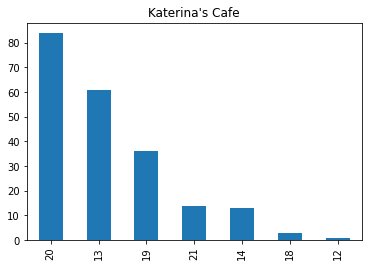

In [160]:
subset = most_popular[most_popular['location'] == "Katerina's Cafe"]
subset['timestamp:hour'].value_counts().plot(kind='bar', title = "Katerina's Cafe")

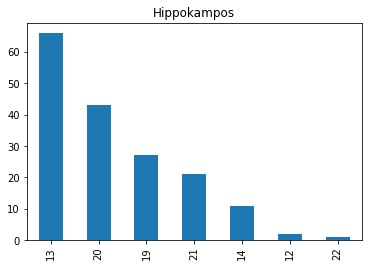

In [161]:
subset = most_popular[most_popular['location'] == "Hippokampos"]
subset['timestamp:hour'].value_counts().plot(kind='bar', title = "Hippokampos")

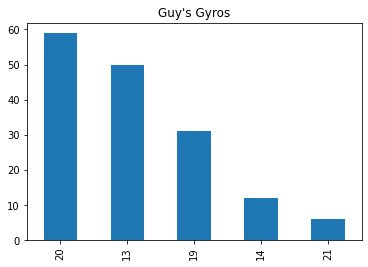

In [162]:
subset = most_popular[most_popular['location'] == "Guy's Gyros"]
subset['timestamp:hour'].value_counts().plot(kind='bar', title = "Guy's Gyros")

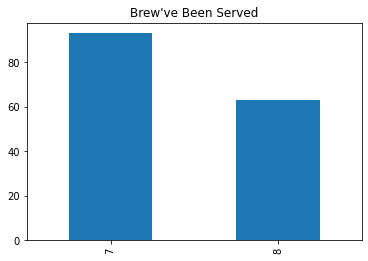

In [163]:
subset = most_popular[most_popular['location'] == "Brew've Been Served"]
subset['timestamp:hour'].value_counts().plot(kind='bar', title = "Brew've Been Served")

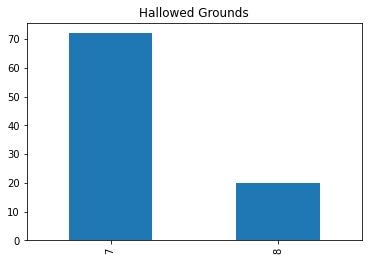

In [164]:
subset = most_popular[most_popular['location'] == "Hallowed Grounds"]
subset['timestamp:hour'].value_counts().plot(kind='bar', title = "Hallowed Grounds")

## Loyalty Card Data

In [188]:
df3 = pd.read_csv("datasets/loyalty_data.csv", index_col = 0)

In [189]:
df3 = df3.reset_index()

In [195]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       1490 non-null   datetime64[ns]
 1   location        1490 non-null   object        
 2   price           1490 non-null   float64       
 3   last4ccnum      1490 non-null   int64         
 4   timestamp:hour  1490 non-null   int64         
 5   timestamp:day   1490 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 70.0+ KB


In [191]:
df3['timestamp:day'] = df3['timestamp']

Merging Credit card data with loyalty data

In [194]:
df1.merge(df3, on = 'timestamp:day')

,timestamp_x,location_x,price_x,last4ccnum,timestamp:hour,timestamp:day,timestamp_y,location_y,price_y,loyaltynum


In [192]:
df1.head()

,timestamp,location,price,last4ccnum,timestamp:hour,timestamp:day
0,2014-01-06 07:28:00,Brew've Been Served,11.34,4795,7,2014-01-06
1,2014-01-06 07:34:00,Hallowed Grounds,52.22,7108,7,2014-01-06
2,2014-01-06 07:35:00,Brew've Been Served,8.33,6816,7,2014-01-06
3,2014-01-06 07:36:00,Hallowed Grounds,16.72,9617,7,2014-01-06
4,2014-01-06 07:37:00,Brew've Been Served,4.24,7384,7,2014-01-06


In [193]:
df3.head()

,timestamp,location,price,loyaltynum,timestamp:day
0,01/06/2014,Brew've Been Served,4.17,L2247,01/06/2014
1,01/06/2014,Brew've Been Served,9.60,L9406,01/06/2014
2,01/06/2014,Hallowed Grounds,16.53,L8328,01/06/2014
3,01/06/2014,Coffee Shack,11.51,L6417,01/06/2014
4,01/06/2014,Hallowed Grounds,12.93,L1107,01/06/2014


## Car Assignments

In [38]:
df2 = pd.read_csv("datasets/car-assignments.csv", index_col = 0)

In [39]:
df2.shape

(44, 4)

In [40]:
df2.head()

,firstname,car_id,employment_type,employment_title
lastname,,,,
Calixto,Nils,1.0,Information Technology,IT Helpdesk
Azada,Lars,2.0,Engineering,Engineer
Balas,Felix,3.0,Engineering,Engineer
Barranco,Ingrid,4.0,Executive,SVP/CFO
Baza,Isak,5.0,Information Technology,IT Technician


In [41]:
df2['car_id'].nunique()

35

In [109]:
df3 = pd.read_csv("datasets/loyalty_data.csv", index_col = 0)

In [110]:
df3.shape


(1392, 3)

In [111]:
df3.head()

,location,price,loyaltynum
timestamp,,,
01/06/2014,Brew've Been Served,4.17,L2247
01/06/2014,Brew've Been Served,9.60,L9406
01/06/2014,Hallowed Grounds,16.53,L8328
01/06/2014,Coffee Shack,11.51,L6417
01/06/2014,Hallowed Grounds,12.93,L1107


In [112]:
df3 = df3.reset_index()

In [113]:
df3['timestamp'] = pd.to_datetime(df3['timestamp'])

In [114]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   timestamp   1392 non-null   datetime64[ns]
 1   location    1392 non-null   object        
 2   price       1392 non-null   float64       
 3   loyaltynum  1392 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 43.6+ KB


In [115]:
df3.timestamp.value_counts()

2014-01-14    123
2014-01-16    123
2014-01-15    122
2014-01-07    122
2014-01-08    122
2014-01-06    119
2014-01-09    118
2014-01-13    117
2014-01-17    108
2014-01-10    103
2014-01-18     67
2014-01-12     54
2014-01-11     51
2014-01-19     43
Name: timestamp, dtype: int64

In [116]:
hi = df3.groupby(['timestamp', 'location'])['location', 'timestamp'].transform('count')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [117]:
hi.head()

,location,timestamp
0,17,17
1,17,17
2,7,7
3,1,1
4,7,7


In [90]:
import matplotlib.pyplot as plt

In [22]:
df3['location'].unique()

array(["Brew've Been Served", 'Hallowed Grounds', 'Coffee Shack',
       'Abila Zacharo', 'Hippokampos', 'Kalami Kafenion',
       "Katerina's Cafe", 'Ouzeri Elian', "Frydos Autosupply n' More",
       'Coffee Cameleon', 'Gelatogalore', "Albert's Fine Clothing",
       "Guy's Gyros", "Shoppers' Delight", 'General Grocer',
       'Kronos Mart', "Octavio's Office Supplies", 'Bean There Done That',
       'Brewed Awakenings', "Jack's Magical Beans",
       'Carlyle Chemical Inc.', 'Abila Airport',
       'Kronos Pipe and Irrigation', 'Maximum Iron and Steel', 'U-Pump',
       'Nationwide Refinery', 'Stewart and Sons Fabrication',
       'Abila Scrapyard', "Frank's Fuel", 'Chostus Hotel',
       'Ahaggo Museum', 'Desafio Golf Course', 'Roberts and Sons'],
      dtype=object)

In [23]:
#perhaps suspicious activity has to do with the nature of the location

In [28]:
#for the geojson file - what are the column names? what are the features ? 
import geopandas

In [29]:
df_geo = geopandas.read_file("datasets/Abila.geojson")

ValueError: LineStrings must have at least 2 coordinate tuples

In [ ]:
#how do we check how to load the dataset if we do not know the columns (area, x and y etc)

In [26]:
with open('datasets/Abila.geojson', 'r') as f:
    data = json.load(f)
df_geo = pd.DataFrame(data)

ValueError: Mixing dicts with non-Series may lead to ambiguous ordering.

In [ ]:
df = pd.read_csv("datasets/gps.csv", index_col = 0)
#there are so many timestamps per id, this will have to be perhaps decreased 
#we could make a timeseries chart with each id, even on a xy graph we'd be able to see what 
#change in lattitude and longitude